In [ ]:
# Importing the Module
import random
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
inputYears = torch.tensor([
    2010, 2011, 2019, 2020, 2021, 2022,
    2023, 2024, 2025.0
])

minTargets = torch.tensor([
     17820, 18160, 24000, 24110, 24820, 25980,
    27400, 32820, 33350
])  # min price per year

maxTargets = torch.tensor([
  25800, 26070, 38565, 38675, 39035, 39730,
    40945, 55720, 56070
])  # max price per year

In [ ]:
# Create class
class LRM(nn.Module):
    def __init__(self):
        super(LRM, self).__init__()
        self.Theta_1ForMinFunct = nn.Parameter(torch.zeros(1))
        self.Theta_0ForMinFunct = nn.Parameter(torch.zeros(1))
        self.Theta_1ForMaxFunct = nn.Parameter(torch.zeros(1))
        self.Theta_0ForMaxFunct = nn.Parameter(torch.zeros(1))

    def forwardMin(self, x):
        # Linear Regression Formula: y = theta_1 * x + theta_0
        out = self.Theta_1ForMinFunct * x + self.Theta_0ForMinFunct
        return out

    def forwardMax(self, x):
        # Linear Regression Formula: y = theta_1 * x + theta_0
        out = self.Theta_1ForMaxFunct * x + self.Theta_0ForMaxFunct
        return out

In [ ]:
# hyper_paramters
lr = 0.0000001
num_epochs = 100
net = LRM()

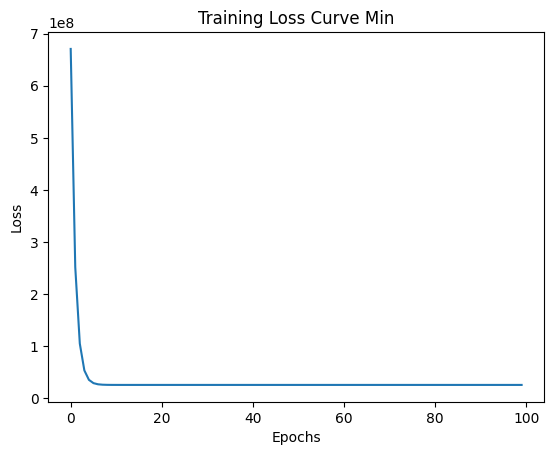

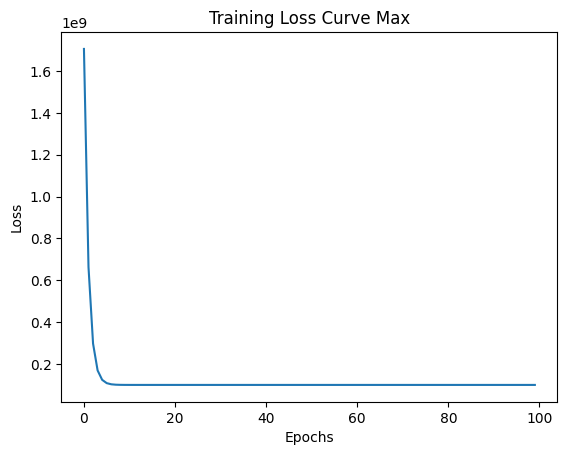

In [ ]:
#Q2=================================================
lossesMin = []
lossesMax = []
for epoch in range(num_epochs):

    #=============Min======================
    #Ok, I need to calc loss and gradient first
    # Forward to get output
    # Using the linear regression forward pass: outputs = theta_1 * inputYears + theta_0
    outputs = net.forwardMin(inputYears)

    # Calculate Loss_f, which is an tensor
    # Loss Formula: Mean Squared Error (MSE) = mean((outputs - targets)^2)
    loss_f = torch.mean((outputs - minTargets)**2)
    lossesMin.append(loss_f.item())
    # Getting gradients  parameters
    #loss_f.backward()
    n1 = len(minTargets)
    # Gradient of MSE  theta_0: gradW00 = (1/n) * sum(outputs - targets)
    gradW00 = (1/n1) * torch.sum((outputs - minTargets))
    # Gradient of MSE  theta_1: gradW01 = (1/n) * sum((outputs - targets) * inputYears)
    gradW01 = (1/n1) * torch.sum((outputs - minTargets) * inputYears)


    # Updating parameters
    with torch.no_grad():#Found this online, in order to make parameters work
      net.Theta_0ForMinFunct -= lr * gradW00
      net.Theta_1ForMinFunct -= lr * gradW01
    #=============Min======================
    #=============Max======================
     # Forward to get output
    # Using the linear regression forward pass: outputs2 = theta_1 * inputYears + theta_0
    outputs2 = net.forwardMax(inputYears)

    # Calculate Loss_f, which is an tensor
    # Loss Formula: Mean Squared Error (MSE) = mean((outputs - targets)^2)
    loss_f2 = torch.mean((outputs2 - maxTargets)**2)
    lossesMax.append(loss_f2.item())
    # Getting gradients w.r.t. parameters
    #loss_f.backward()
    n2 = len(maxTargets)
    # Gradient of MSE theta_0: gradW002 = (1/n) * sum(outputs2 - targets)
    gradW002 = (1/n2) * torch.sum((outputs2 - maxTargets))
    # Gradient of MSE theta_1: gradW012 = (1/n) * sum((outputs2 - targets) * inputYears)
    gradW012 = (1/n2) * torch.sum((outputs2 - maxTargets) * inputYears)

    # Updating parameters
    with torch.no_grad():#Found this online, in order to make parameters work
      net.Theta_0ForMaxFunct -= lr * gradW002
      net.Theta_1ForMaxFunct -= lr * gradW012
    #=============Max======================


#plotting min loss no norm
plt.plot(lossesMin)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve Min')
plt.show()

#plotting max loss no norm
plt.plot(lossesMax)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve Max')
plt.show()

tensor([25302, 25315, 25327, 25340, 25352, 25365, 25378])
tensor([39942, 39962, 39982, 40002, 40021, 40041, 40061])
Theta0 for min
Parameter containing:
tensor([0.0061], requires_grad=True)
Theta1 for min
Parameter containing:
tensor([12.5759], requires_grad=True)
Parameter containing:
tensor([0.0096], requires_grad=True)
Parameter containing:
tensor([19.8521], requires_grad=True)


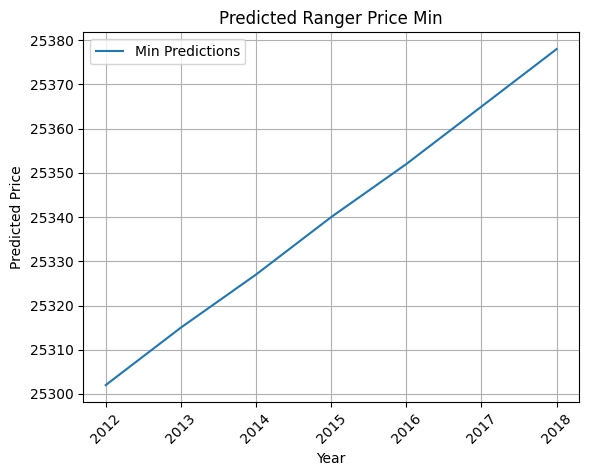

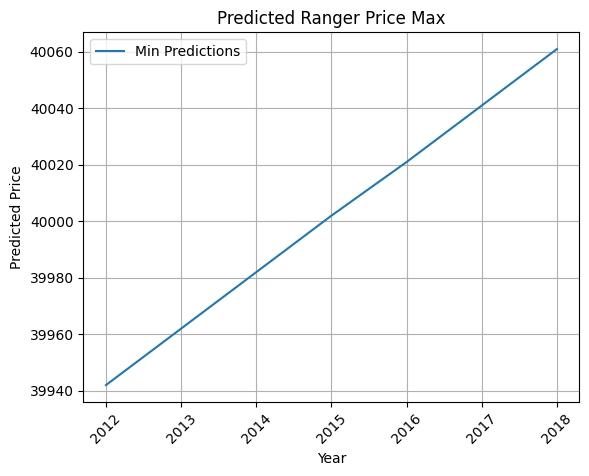

In [ ]:
#Q3==============================================
#So, i need to predict price of ranger for 2012 to 1028
#How can I do this?
m=7
predictionsMin = torch.tensor([0,0,0,0,0,0,0])
predicitonsYears = torch.tensor([2012,2013,2014,2015,2016,2017,2018])
for m in range(m):
    predictionsMin[m]= net.forwardMin(predicitonsYears[m])  # Linear regression formula: y = θ0 + θ1 * x
print(predictionsMin)

m=7
predictionsMax = torch.tensor([0,0,0,0,0,0,0])
predicitonsYears = torch.tensor([2012,2013,2014,2015,2016,2017,2018])
for m in range(m):
    predictionsMax[m]= net.forwardMax(predicitonsYears[m])  # Linear regression formula: y = θ0 + θ1 * x
print(predictionsMax)

yearsGraph = torch.tensor([2012,2013,2014,2015,2016,2017,2018])
minGraph = predictionsMin.detach().numpy()
maxGraph = predictionsMax.detach().numpy()

#generating the final output values
outputs = net.forwardMin  # Linear regression mapping: y = θ0 + θ1 * x

#printing the final theta values
#Q4=====================================================
print("Theta0 for min")
print(net.Theta_0ForMinFunct)   # Intercept (θ0) for min prediction line
print("Theta1 for min")
print(net.Theta_1ForMinFunct)   # Slope (θ1) for min prediction line
print(net.Theta_0ForMaxFunct)   # Intercept (θ0) for max prediction line
print(net.Theta_1ForMaxFunct)   # Slope (θ1) for max prediction line

#Q5==================================================
#Plotting min pred no norm
plt.plot(yearsGraph,minGraph,label = "Min Predictions")
#plt.plot(yearsGraph,maxGraph,label = "Max Predictions")
plt.xlabel("Year")
plt.ylabel("Predicted Price")
plt.title('Predicted Ranger Price Min')
plt.xticks(yearsGraph, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

#plot max pred no morn
plt.plot(yearsGraph,maxGraph,label = "Min Predictions")
#plt.plot(yearsGraph,maxGraph,label = "Max Predictions")
plt.xlabel("Year")
plt.ylabel("Predicted Price")
plt.title('Predicted Ranger Price Max')
plt.xticks(yearsGraph, rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#I need to normalize the numbers, thus I need mean, and Range
yearsMean = inputYears.mean()     # Compute mean of input years
yearsStd = inputYears.std()       # Compute standard deviation (spread, used as "range")
yearsStandardized = (inputYears - yearsMean) / yearsStd   # Standardization formula: z = (x - μ) / σ
print(yearsStandardized)

tensor([-1.7455, -1.5606, -0.0821,  0.1027,  0.2875,  0.4723,  0.6571,  0.8419,
         1.0267])


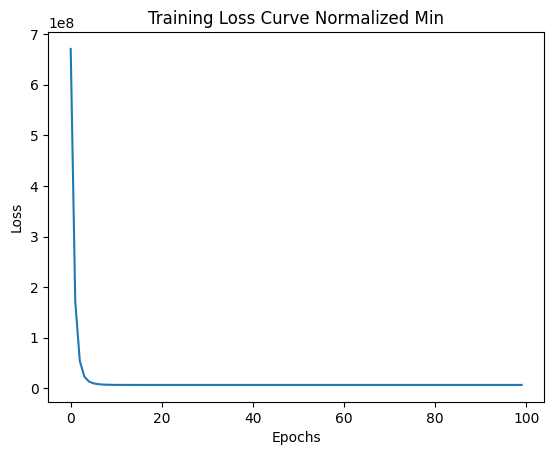

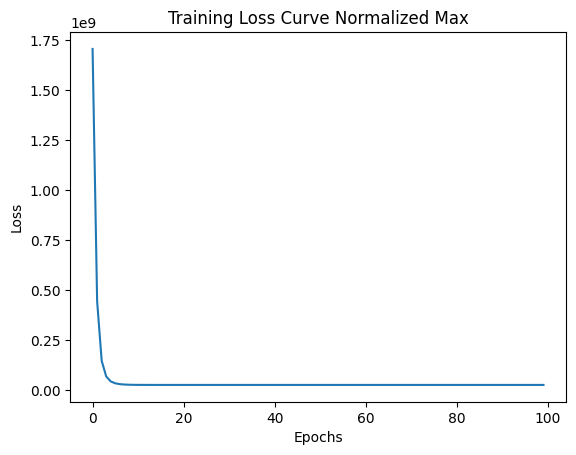

In [ ]:
#Q6============================
lossesMinN = []
lossesMaxN = []
lrN = 0.5
epoch = 0
num_epochs =100
with torch.no_grad():
    net.Theta_0ForMinFunct = nn.Parameter(torch.rand(1))
    net.Theta_1ForMinFunct = nn.Parameter(torch.rand(1))
    net.Theta_0ForMaxFunct = nn.Parameter(torch.rand(1))
    net.Theta_1ForMaxFunct = nn.Parameter(torch.rand(1))
for epoch in range(num_epochs):

    #=============Min======================
    #Ok, I need to calc loss and gradient first
    # Forward to get output
    c = 10; #smaller decrases values
    lrN = lrN* (c/(c+epoch)) #dynamic lr formula a=a(c/(c+t))
    outputsN = net.forwardMin(yearsStandardized)   # Using the linear regression forward pass: outputs = theta_1 * inputYears + theta_0

    # Calculate Loss_f, which is an tensor
    # Loss Formula: Mean Squared Error (MSE) = mean((outputs - targets)^2)
    loss_fN = torch.mean((outputsN - minTargets)**2)
    lossesMinN.append(loss_fN.item())
    # Getting gradients w.r.t. parameters
    #loss_f.backward()
    n1N = len(minTargets)
        # Gradient of MSE  theta_0: gradW00 = (1/n) * sum(outputs - targets)
    gradW00N = (1/n1N) * torch.sum((outputsN - minTargets))
     # Gradient of MSE  theta_1: gradW01 = (1/n) * sum((outputs - targets) * inputYears)
    gradW01N = (1/n1N) * torch.sum((outputsN - minTargets) * yearsStandardized)

    # Updating parameters
    with torch.no_grad():#Found this online, in order to make parameters work
      net.Theta_0ForMinFunct -= lrN * gradW00N
      net.Theta_1ForMinFunct -= lrN * gradW01N
    #=============Min======================
    #=============Max======================
     # Forward to get output
       # Using the linear regression forward pass: outputs2 = theta_1 * inputYears + theta_0
    outputs2N = net.forwardMax(yearsStandardized)

    # Calculate Loss_f, which is an tensor
    loss_f2N = torch.mean((outputs2N - maxTargets)**2)
    lossesMaxN.append(loss_f2N.item())
    # Getting gradients w.r.t. parameters
    #loss_f.backward()
    n2N = len(maxTargets)
    gradW002N = (1/n2N) * torch.sum((outputs2N - maxTargets))
    gradW012N = (1/n2N) * torch.sum((outputs2N - maxTargets) * yearsStandardized)

    # Updating parameters
    with torch.no_grad():#Found this online, in order to make parameters work
      net.Theta_0ForMaxFunct -= lrN * gradW002N
      net.Theta_1ForMaxFunct -= lrN * gradW012N
    #=============Max======================
    #=============Dynamic LR======================
   # c = 100000;
   # lrN = lrN* (c/(c+epoch))


#Q7. Yes I do see improvements. The curve decrease faster and reaches lower numbers===================
#Ploting min loss nomr
plt.plot(lossesMinN)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve Normalized Min')
plt.show()

#plot max loss norm
plt.plot(lossesMaxN)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve Normalized Max')
plt.show()

tensor([-1.7455, -1.5606, -0.0821,  0.1027,  0.2875,  0.4723,  0.6571,  0.8419,
         1.0267])
tensor([17421.0859, 18262.3672, 19103.6484, 19944.9297, 20786.2129, 21627.4941,
        22468.7773], grad_fn=<AddBackward0>)
tensor([25514.4180, 27108.7949, 28703.1699, 30297.5449, 31891.9199, 33486.2969,
        35080.6719], grad_fn=<AddBackward0>)
Theta0 for min
Parameter containing:
tensor([23683.9727], requires_grad=True)
Theta1 for min
Parameter containing:
tensor([4552.0874], requires_grad=True)
Parameter containing:
tensor([37383.6797], requires_grad=True)
Parameter containing:
tensor([8626.9971], requires_grad=True)


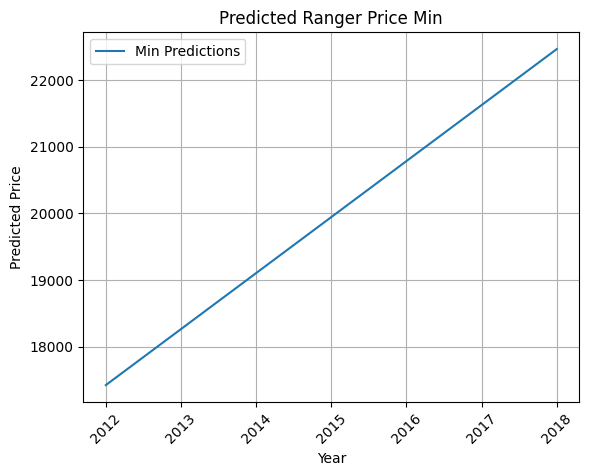

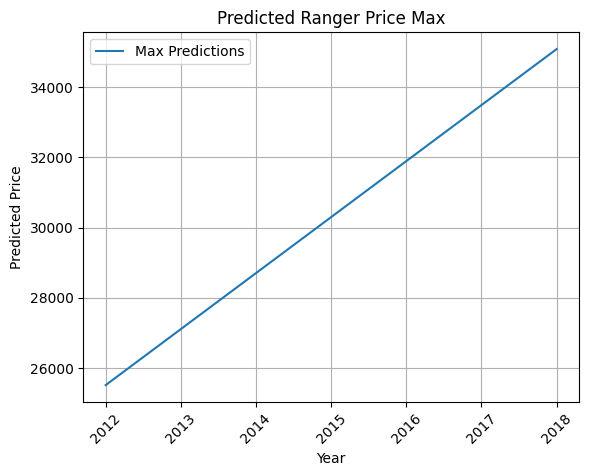

In [ ]:
#Q8===============================
#So, i need to predict price of ranger for 2012 to 1028
#How can I do this?

#===============Seting up Min Tensors=========================
m=7
predicitonsYears = torch.tensor([2012,2013,2014,2015,2016,2017,2018])
#============Standardize Input================================
predicitonsYearsNorm = (predicitonsYears - yearsMean) / yearsStd
print(yearsStandardized)
#============Standardize Input================================
#============Calc Min Values==================================
predictionsMinN = net.forwardMin(predicitonsYearsNorm)
print(predictionsMinN)
#============Calc Min Values==================================
#============Calc Max Values==================================
predictionsMaxN = net.forwardMax(predicitonsYearsNorm)
print(predictionsMaxN)
#============Calc Max Values==================================
yearsGraph = predicitonsYears.detach().numpy()
minGraph = predictionsMinN.detach().numpy()
maxGraph = predictionsMaxN.detach().numpy()

#generating the final output values
outputs = net.forwardMin

#printing the final theta values, look at comments for non norm as they should be the same
print("Theta0 for min")
print(net.Theta_0ForMinFunct)
print("Theta1 for min")
print(net.Theta_1ForMinFunct)
print(net.Theta_0ForMaxFunct)
print(net.Theta_1ForMaxFunct)

#Q9=========================================
#Platoing Nrom Min
plt.plot(yearsGraph,minGraph,label = "Min Predictions")
plt.xlabel("Year")
plt.ylabel("Predicted Price")
plt.title('Predicted Ranger Price Min')
plt.xticks(yearsGraph, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

#Plotting norm max
plt.plot(yearsGraph,maxGraph,label = "Max Predictions")
plt.xlabel("Year")
plt.ylabel("Predicted Price")
plt.title('Predicted Ranger Price Max')
plt.xticks(yearsGraph, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Alright, so for this first assignment, my program predicts the price range of the next generation Ranger for 2026. Based on the linear regression models I trained, the predicted minimum price for 2026 is around 23310, and the predicted maximum price is around 36675. The final values for Theta after training the normalized model are approximately: Theta0 for min is 23683.97, Theta1 for min is 4552.12, Theta0 for max is 37383.65, and Theta1 for max is 8627.01.

Honestly, I think my model is a decent starting point for a simple linear regression. The loss curves show that it converged, which is good. Comparing the non-normalized and normalized models, the normalized one definitely converged faster and reached lower loss values, which is a clear improvement. However, I could play around with the learning rate and number of epochs more to see if I can get the loss even lower. Also the values are a bit lower then they should be.

As for buying a next-gen Ranger at that price, as a student, that's a pretty big price. SO no as I can not afford it.

To find the gradients of the loss with respect to the weights ($\theta_1$) and bias ($\theta_0$), we take the partial derivatives of the MSE with respect to each parameter.

The gradient of the MSE with respect to $\theta_0$ is:

$\frac{\partial J}{\partial \theta_0} = \frac{1}{M} \sum_{i=1}^{n} (y_i - \hat{y}_i)$

The gradient of the MSE with respect to $\theta_1$ is:

$\frac{\partial J}{\partial \theta_1} = \frac{1}{M} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)$
